<a href="https://colab.research.google.com/github/fab8a/CO2-emision-analysis/blob/main/Analisis_emisiones_CO2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar las librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

Definir los data sets utilizados


In [2]:
!#git clone 'https://github.com/owid/co2-data.git'
df_co2 = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

## Ha sido la pandemia del Covid-19 el suceso histórico más impactante en cuanto a las emisiones de CO2 a nivel mundial?

Con el afán de observar y analizar el impacto que tuvo la pandemia del Covid-19 en el planeta tierra y más específicamente en las emisiones totales de CO2, a continuación se presentan un par de gráficos.

El primero es una comparación entre las emisiones de CO2 acumuladas a nivel mundial, en el primer eje, contra la variación porcentual de CO2 del año en curso.

Posteriormente, en la gráfica del lado derecho se expone la variación absoluta del año calendarico.

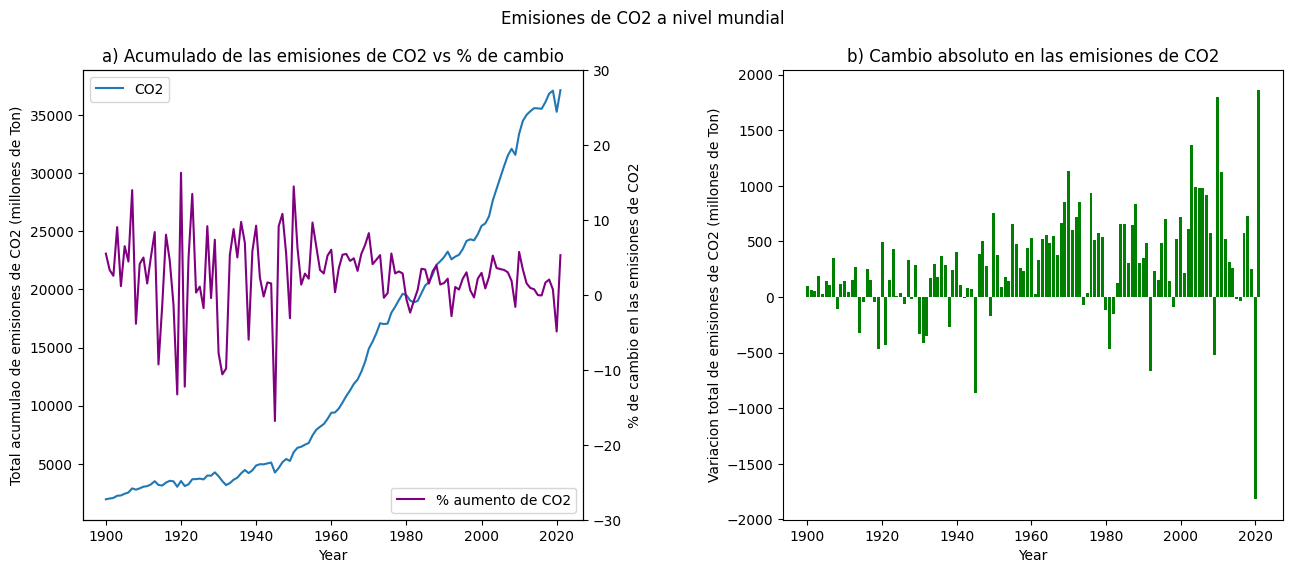

In [3]:
world = df_co2.loc[df_co2['country'] == 'World', ['year', 'co2', 'co2_growth_abs', 'co2_growth_prct']]
periodo = range(1900,2022)

world = world[world['year'].isin(periodo)]
world.sort_values(by='co2_growth_prct').head(10)

fig, (ax1,ax3) = plt.subplots(1, 2, figsize=(16,6))
world.plot(x='year', y='co2', kind='line', ax=ax1, color='C0', grid=False, label='CO2')
ax2 = ax1.twinx()
world.plot(x='year', y='co2_growth_prct', kind='line', ax=ax2, color='purple', grid=False, label='% aumento de CO2')

ax3.bar(world['year'], world['co2_growth_abs'], color='green')
ax3.grid(visible=False)

ax1.set_xlabel('Year')
ax1.set_ylabel('Total acumulao de emisiones de CO2 (millones de Ton)')
ax2.set_ylabel('% de cambio en las emisiones de CO2')
ax2.set_ylim(-30,30)
ax1.set_title('a) Acumulado de las emisiones de CO2 vs % de cambio')

ax3.set_xlabel('Year')
ax3.set_ylabel('Variacion total de emisiones de CO2 (millones de Ton)')
ax3.set_title('b) Cambio absoluto en las emisiones de CO2')


fig.suptitle('Emisiones de CO2 a nivel mundial')
fig.subplots_adjust(left=0.15, right=0.9, bottom=0.13, top=0.88, wspace=0.4, hspace=0.5)
ax1.legend(loc='upper left', )
ax2.legend(loc='lower right')

plt.show()

Mediante los 3 datos históricos presentados anteriormente se pueden derivar algunas pequeñas conclusiones relacionadas con la hipótesis principal.

Si bien en términos de toneladas métricas absolutas, es decir, la reducción de emisiones de CO₂ de un año a otro (B), el 2020 fue el año de mayor reducción de emisiones en la historia, este mismo año en cuestión porcentual apenas rebasa el 5% de reducción.

En contraste, en los periodos de la primera y segunda guerra mundial, los cambios absolutos no fueron de la misma magnitud que hoy en día, sin embargo, proporcionalmente al total de emisiones del correspondiente año anterior lo fueron mucho mayores, representado con un % de varianza más elevado.

La razón de ello puede encontrarse en el gráfico 'a'. Inmediatamente después de la segunda guerra mundial acuerdos internacionales se realizaron para evitar daños al medio ambiente tan severos como los vistos en las últimas épocas, resultando en una constante, pero bastante pronunciada tendencia al alza.

El gráfico de línea azul representando el total de emisiones escalo de manera acelerada desde la época de los 1950, mientras que la varianza anual se mantuvo en un periodo de consolidación en un rango de entre -5% y 5% de cambio anual.

Debido a esto, cuando llego un evento como la pandemia que genero una cambio drástico en las emisiones de CO₂, el total era ya tan elevado, que aunque en papel suena como algo significativo, en realidad no tuvo una consecuencia % pronunciada.

---

# Que otros eventos históricos han tenido relevancia en el medio ambiente y en las emisiones de CO₂ a nivel global?

Para investigar dichos hechos se utilizó el mismo dataset teniendo que limpiar un poco la información para obtener datos relevantes.

Dicho DS contiene información presentada por país peor también empaquetada por continente y por algunos otros parámetros sociales/económicos. Como de momento no nos interesa dichos datos se filtró el DataSet respectivamente.

De la misma manera para obtener datos interesantes se limitó a mostrar las observaciones con un número mínimo de reducción absoluta en las emisiones de CO₂, puesto que en ocasiones un cambio de unas centenas de toneladas podía representar un cambio % muy alto para un país.

Finalmente se obtuvo los casos de reducción más significativa, ordenando de manera ascendiente el DataSet utilizando el 'co2_growth_prct' como parámetro de medición.

In [4]:
to_remove = ['Low-income countries', 'Lower-middle-income countries', 'Asia', 'Europe', 'America', 'Africa', 'European Union', 'High-income countries', 'International transport', 'Upper-middle-income countries', 'World', 'South America', 'Oceania', 'North America', 'European Union (27)', 'European Union (27)',	'European Union (28)', 'Asia (excl. China and India)', 'Europe (excl. EU-28)']
cleaned = df_co2[~df_co2['country'].isin(to_remove)]
labels = ['Pais', 'Año', 'Total CO2', '% delta emisiones de CO2', 'Cambio neto emisiones de CO2', 'Emisiones CO2 p/capita']

In [5]:
df = cleaned.loc[(cleaned['co2_growth_abs'] < -20) & (cleaned['co2_per_capita'] < 200), ['country', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita']]
df = df.sort_values(by='co2_growth_prct')
df.columns = labels
df.head(10)

,Pais,Año,Total CO2,% delta emisiones de CO2,Cambio neto emisiones de CO2,Emisiones CO2 p/capita
37341,Poland,1919,2.730,-97.311,-98.796,0.115
24361,Kuwait,1992,29.648,-93.984,-463.193,18.294
21910,Iran,1951,6.914,-91.781,-77.204,0.402
22762,Italy,1943,7.112,-83.021,-34.777,0.160
18047,Germany,1945,116.065,-80.665,-484.209,1.626
49220,Venezuela,1947,20.496,-74.396,-59.555,4.096
3868,Austria,1916,9.087,-74.290,-26.256,1.392
37367,Poland,1945,59.458,-68.547,-129.582,2.229
38476,Russia,1918,24.372,-60.119,-36.740,0.319
11511,Czechia,1945,34.988,-46.930,-30.940,3.272


Con dicha tabla y valores presentados podemos realizar una investigación enbúsqueda de las razones por las cuales existieron semejantes aumentos y/o reducciones en las emisiones de CO₂ de cierto país y así identificar como la pandemia del Covid-19 se compara con los mismos. Teniendo en cuenta que este reciente evento no logro entrar dentro de los 10 más significativos para ningún país.

- **Polonia en 1919** - El primer año posterior al desalojo de las fuerzas armadas Alemanas en el país, y el inicio de la guerra contra el ejército de ocupación Ruso.
- **Kuwait en 1992** - El año posterior a los afamados incendios de petróleo en Kuwait, en donde el ejército Iraquí incendio entre 606 y 750 pozos petroleros en las costas de Kuwait, resultando en uno de los desastres ambientales mas grandes en la historia moderna.
- **Irán en 1951** - Seguido a conflictos políticos en el estado Iraní, el gobierno de Irán decidió nacionalizar el petróleo y tomar control de la mayoría de las operaciones de las compañías británicas de extracción de petróleo, debido a mala administración y negarse a emplear a los previos trabajadores la extracción y producción de petróleo se redujo significativamente.
- **Italia en 1943 y Alemania en 1945** - Como podremos observar en el resto de la investigación, las guerras y conflictos armados así como políticos han sido los factores que mas han logrado detener a las potencias en cuestiones de industria, suficiente para ser detectable en las emisiones de CO₂ de dichos países.
<br>
---

# Impacto de los hechos histórico-sociales mas significativos al medio ambiente a escala global

Con la información obtenida en los análisis anteriores resulta interesante comparar directamente el efecto que la pandemia como fenómeno social a escala global se compara con otros sucesos históricos como lo son las grandes guerras.

Para ello se delimitaron unos países de interés así como los rangos de tiempo en cuestión de años que sé desear observar y analizar.

Se formaron los sets de datos correspondientes para cada hecho utilizando dichas listas y se graficaron los resultados de manera comparativa.

In [6]:
paises = ['China', 'France', 'Germany', 'India', 'Mexico', 'United States']
variables = ['country', 'year', 'population', 'co2', 'co2_growth_prct']

primera_guerra = range(1912, 1923)
gran_depresion = range(1929, 1940)
segunda_guerra = range(1939, 1950)
gripe_espaniola = range(1918, 1921)
pandemia = range(2011, 2022)

In [7]:
paises_co2 = df_co2.loc[df_co2['country'].isin(paises)]
paises_co2 = paises_co2.loc[:, variables]

Los cuatro gráficos realizan una comparación de siete países de interés en un lapso de 10 años circundantes al hecho históricos referido en el título de cada gráfico. El eje de valores plantea el % de cambio en las emisiones de CO₂ que sufrió cada país en el año especificado, siendo una medición del total anual en comparación con el total del año anterior.

<ipython-input-8-9abc56886361>:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(plots, labels=paises, loc='center right')


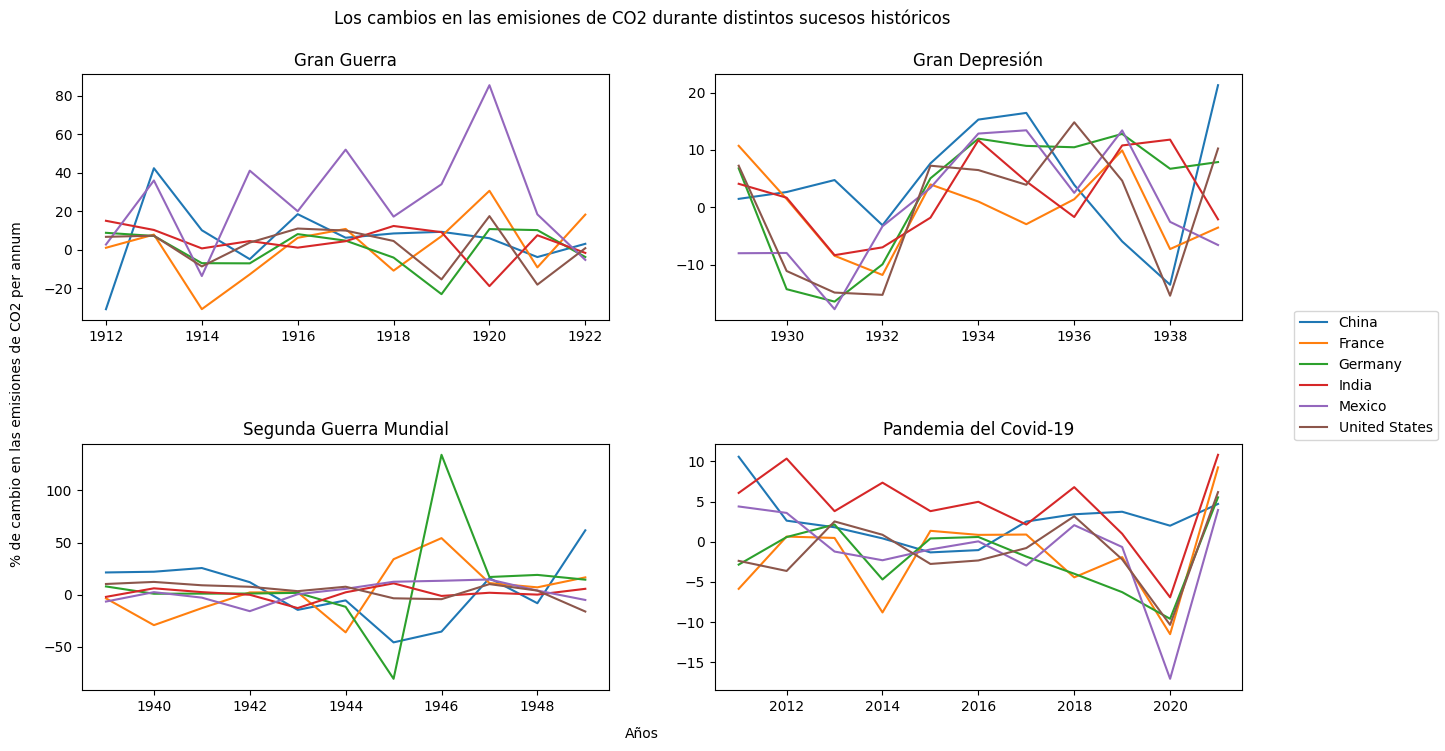

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize =(16,8))

pg = paises_co2[paises_co2['year'].isin(primera_guerra)].groupby('country')
for country, group in pg:
  l1 = ax[0,0].plot(group['year'], group['co2_growth_prct'], label=country)
  ax[0,0].set_title('Gran Guerra')
  #plt.yscale('log')

gp = paises_co2[paises_co2['year'].isin(gran_depresion)].groupby('country')
for country, group in gp:
  l2 = ax[0,1].plot(group['year'], group['co2_growth_prct'], label=country)
  ax[0,1].set_title('Gran Depresión')

  #plt.yscale('log')

sg = paises_co2[paises_co2['year'].isin(segunda_guerra)].groupby('country')
for country, group in sg:
  l3 = ax[1,0].plot(group['year'], group['co2_growth_prct'], label=country)
  ax[1,0].set_title('Segunda Guerra Mundial')

  #plt.yscale('log')

pd = paises_co2[paises_co2['year'].isin(pandemia)].groupby('country')
for country, group in pd:
  l4 = ax[1,1].plot(group['year'], group['co2_growth_prct'], label=country)
  ax[1,1].set_title('Pandemia del Covid-19')
  #plt.yscale('log')

plots = [l1, l2, l3, l4]

fig.text(0.5, 0.07, 'Años', ha='center')
fig.text(0.105, 0.5, '% de cambio en las emisiones de CO2 per annum', va='center', rotation='vertical')

fig.suptitle('Los cambios en las emisiones de CO2 durante distintos sucesos históricos')
fig.subplots_adjust(left=0.15, right=0.875, bottom=0.13, top=0.9, wspace=0.2, hspace=0.5)
fig.legend(plots, labels=paises, loc='center right')

plt.show()

Con las gráficas planteadas nuevamente se pueden realizar varias observaciones e incluso un par de conclusiones referentes a la hipótesis en cuestión.

Si bien es cierto, como lo vimos la primera sección, la pandemia del covid-19 tuvo un gran efecto en la sociedad, sin embargo, el efecto en el planeta y específicamente en las emisiones de CO₂ no fueron tan significativas, al rededor de una disminución de 5%, igual para la mayorías de los países de forma independiente.

Podemos observar como muchos de los sucesos son mas demográficamente impactantes, como lo fue la segunda guerra para Alemania y Francia, o la Depresión de 1930 para EUA y China. Posiblemente esa es la razón por la que se siente tan impactante el Covid-19, el hecho de ser un fenómeno totalmente mundial.

Es interesante observar como durante la reciente pandemia México fue al menos de los países estudiados el mas afectado (positivamente) en cuestión de emisiones de CO₂, lo que puede indicar una falta de preparación por parte del país y por consecuente un mayor paro en las actividadas económicas.

Finalmente, gracias a los datos limpiados, cotejado y analizados podemos concluir que si bien en papel la pandemia del covid-19 tuvo graves estragos en nuestra sociedad, **no ha sido el hecho histórico mas significativo** en cuanto a emisiones humanas de CO₂ al ambiente se refiere y por ende al darle un respiro a la tierra de potenciales danos permanentes.

---

In [9]:
#La variación de México de población y co2 emitido

mx_poblacion = df_co2.loc[df_co2['country'] == 'Mexico', ['year','population', 'co2' ]]
mx_co2 = df_co2.loc[df_co2['country'] == 'Mexico', ['co2']]
años = df_co2.loc[df_co2['country'] == 'Mexico', ['year']]

china_poblacion = df_co2.loc[df_co2['country'] == 'China', ['year','population', 'co2' ]]
china_co2 = df_co2.loc[df_co2['country'] == 'China', ['co2']]
años = df_co2.loc[df_co2['country'] == 'China', ['year']]

mx_poblacion['Variación poblacion'] = mx_poblacion['population'].pct_change() * 100. # Variación de població de México
mx_poblacion['Variación co2'] = mx_poblacion['co2'].pct_change() * 100. # Variación de co2 de México

china_poblacion['Variación poblacion'] = china_poblacion['population'].pct_change() * 100. # Variación de població de México
china_poblacion['Variación co2'] = china_poblacion['co2'].pct_change() * 100. # Variación de co2 de México


mx_poblacion_recortada = mx_poblacion[(mx_poblacion['year'] >= 1930) & (mx_poblacion['year'] <= 2023)] # Recorte de años
china_poblacion_recortada = china_poblacion[(china_poblacion['year'] >= 1930) & (china_poblacion['year'] <= 2023)] # recorte de Años

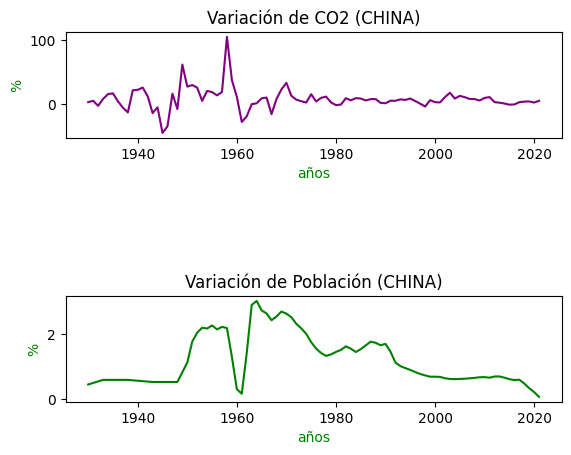

In [10]:
fig, axes = plt.subplots(2)

axes[0].plot(china_poblacion_recortada[['year']], china_poblacion_recortada[['Variación co2']], color = 'purple')

axes[0].set_title('Variación de CO2 (CHINA)')
axes[0].set_ylabel('%', color = 'green')
axes[0].set_xlabel('años', color = 'green')

axes[1].plot(china_poblacion_recortada[['year']], china_poblacion_recortada[['Variación poblacion']], color = 'green')
axes[1].set_title('Variación de Población (CHINA)')
axes[1].set_ylabel('%', color = 'green')
axes[1].set_xlabel('años', color = 'green')

fig.subplots_adjust(hspace=1.5)

plt.show()

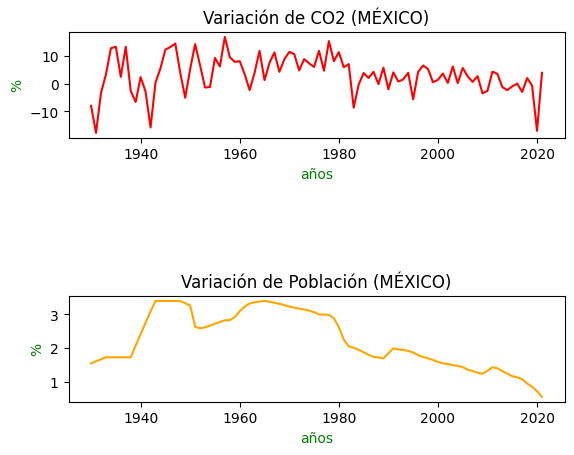

In [11]:
fig, axes = plt.subplots(2)

axes[0].plot(mx_poblacion_recortada[['year']], mx_poblacion_recortada[['Variación co2']], color = 'red')
axes[0].set_title('Variación de CO2 (MÉXICO)')
axes[0].set_ylabel('%', color = 'green')
axes[0].set_xlabel('años', color = 'green')

axes[1].plot(mx_poblacion_recortada[['year']], mx_poblacion_recortada[['Variación poblacion']], color = 'orange')
axes[1].set_title('Variación de Población (MÉXICO)')
axes[1].set_ylabel('%', color = 'green')
axes[1].set_xlabel('años', color = 'green')

fig.subplots_adjust(hspace=1.5)

plt.show()

---

In [12]:
# Filtrar los datos para obtener solo las emisiones y el PIB de Estados Unidos
us_co2_pib = df_co2.loc[df_co2['country'] == 'Mexico', ['year', 'co2', 'gdp']]

In [13]:
# Eliminar filas que contengan datos faltantes
us_co2_pib = us_co2_pib.dropna()

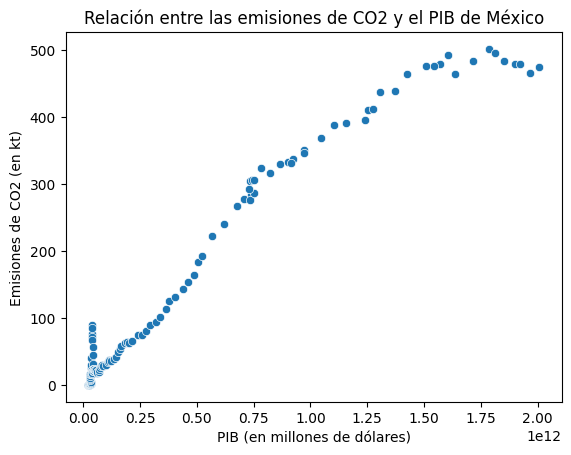

In [14]:
# Crear una gráfica de dispersión para visualizar la relación entre las emisiones de CO2 y el PIB
sns.scatterplot(x="gdp", y="co2", data=us_co2_pib)
plt.xlabel('PIB (en millones de dólares)')
plt.ylabel('Emisiones de CO2 (en kt)')
plt.title('Relación entre las emisiones de CO2 y el PIB de México')
plt.show()
# Realizar una regresión lineal para analizar la relación entre las variables
X = us_co2_pib[['gdp']]
y = us_co2_pib['co2']


Filtrar los datos para obtener solo las emisiones per cápita del año 2019

In [15]:
co2_pc_2019 = df_co2.loc[(df_co2['year'] == 2019) & (df_co2['co2'] > 0)].sort_values(by='co2_per_capita', ascending=False)
co2_pc_2020 = df_co2.loc[(df_co2['year'] == 2020) & (df_co2['co2'] > 0)].sort_values(by='co2_per_capita', ascending=False)

Seleccionar los 15 países con las mayores emisiones per cápita

In [16]:
top15_2019 = co2_pc_2019.head(15)
top15_2020 = co2_pc_2020.head(15)

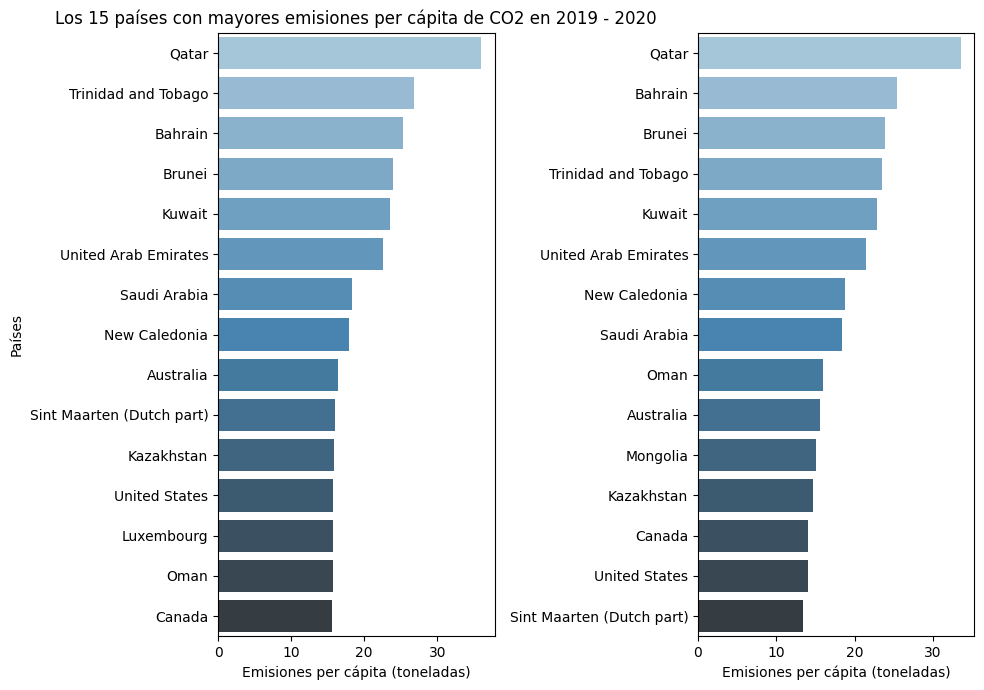

In [17]:
# crear figura y ejes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))

# primer barplot
sns.barplot(x="co2_per_capita", y="country", data=top15_2019, palette="Blues_d", ax=ax1)
ax1.set_xlabel("Emisiones per cápita (toneladas)")
ax1.set_ylabel("Países")
ax1.set_title("Los 15 países con mayores emisiones per cápita de CO2 en 2019 - 2020")

# segundo barplot
sns.barplot(x="co2_per_capita", y="country", data=top15_2020, palette="Blues_d", ax=ax2)
ax2.set_xlabel("Emisiones per cápita (toneladas)")
ax2.set_ylabel("")  # no necesitamos etiquetar el eje y dos veces

# ajustar diseño
plt.tight_layout()

# mostrar gráfico
plt.show()

Podemos observar que en 2019, los cinco países con las mayores emisiones per cápita son Qatar, Kuwait, Emiratos Árabes Unidos, Trinidad y Tobago, y Arabia Saudita. En 2020, estos mismos países se mantienen en los primeros puestos, pero algunos han intercambiado posiciones. También podemos observar que la mayoría de los países en el top 15 han mantenido niveles similares de emisiones per cápita entre 2019 y 2020, aunque algunos han experimentado cambios significativos.

In [18]:
df_2019 = df_co2[df_co2['year'] == 2019]
co2_por_pais_2019 = df_2019.groupby('iso_code')['co2'].sum().reset_index()

fig_2019 = go.Figure(data=go.Choropleth(
    locations=co2_por_pais_2019['iso_code'],
    z=co2_por_pais_2019['co2'],
    text=co2_por_pais_2019['iso_code'],
    colorscale=[(0, '#85A838'), (1, '#1a237e')],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='CO2 (kt)',
))
fig_2019.update_layout(
    title_text='Distribución geográfica de las emisiones de CO2 en el año 2019 (kilotoneladas)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

In [19]:
co2_por_country_2019 = df_2019.groupby('country')['co2'].sum().reset_index()
co2_por_country_2019.head(15)

,country,co2
0,Afghanistan,11.082
1,Africa,1467.492
2,Africa (GCP),1467.477
3,Aland Islands,0.000
4,Albania,4.947
5,Algeria,179.505
6,American Samoa,0.000
7,Andorra,0.480
8,Angola,21.818
9,Anguilla,0.154


In [20]:
df_2020 = df_co2[df_co2['year'] == 2020]
co2_por_pais_2020 = df_2020.groupby('iso_code')['co2'].sum().reset_index()

fig_2020 = go.Figure(data=go.Choropleth(
    locations=co2_por_pais_2020['iso_code'],
    z=co2_por_pais_2020['co2'],
    text=co2_por_pais_2020['iso_code'],
    colorscale=[(0, '#85A838'), (1, '#1a237e')],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='CO2 (kt)',
))
fig_2020.update_layout(
    title_text='Distribución geográfica de las emisiones de CO2 en el año 2020 (kilotoneladas)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
